In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import random
from math import isqrt
from scipy.spatial.distance import cityblock
from heapq import heappop, heappush, heapify

In [2]:
def not_sames(a,b,n):
    result = 0
    inds = []
    for i in range (n):
        if a[i] != b[i]:
            result = result + 1
            inds.append(i)
    return result , inds

In [3]:
df = pd.read_csv("uspsdata.txt", sep="	",header=None)
y = pd.read_csv("uspscl.txt", sep="\n",header=None).to_numpy()

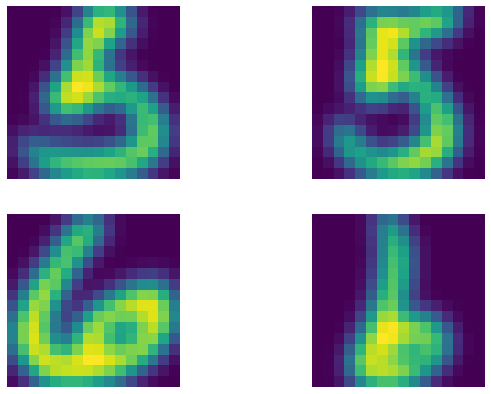

In [4]:
fig = plt.figure(figsize=(10, 7))
x = df.to_numpy().reshape(200,16,16)

for i in range(0,4):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(x[i])
#     Image.fromarray(np.uint8(x[i])).show()
    plt.axis('off')

In [5]:
n = df.shape[0]
n_test = n//5
n_train = n - n_test

In [14]:
test_indx = random.sample(range(n), n_test)

In [15]:
x_train_raw = df.drop(test_indx).to_numpy().reshape(n_train,16,16)
y_train = np.delete(y, test_indx).reshape(n_train)
x_test_raw = df.iloc[test_indx,:].to_numpy().reshape(n_test,16,16)
y_test = y[test_indx].reshape(n_test)

In [ ]:
x_train_raw.shape

(160, 16, 16)

In [16]:
x_temp = []
for t in x_train_raw:
    temp = Image.fromarray(np.uint8(t))
    x_temp.append(np.asarray(temp))
x_train = np.array(x_temp).reshape(n_train,256)
x_temp = []
for t in x_test_raw:
#     temp = Image.fromarray(np.uint8(t))
    x_temp.append(np.asarray(Image.fromarray(np.uint8(t))))
x_test = np.array(x_temp).reshape((n_test,256))

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(160, 256) (160,) (40, 256) (40,)


In [19]:
k_list = [3,5,7,9,11,13,1]
# dist = []
for k in k_list:
    y_hat = []
    for t in x_test:
        dist = []
        to_be_voted = []
        for c in x_train:
            temp = t - c
#             dist.append(np.dot(temp.T, temp))
            dist.append(cityblock(t, c))
            sort = sorted(dist, key = lambda x:float(x), reverse = True)
    #         values.append(sort.index(sort[-5:]))
    #         to_be_voted = y_train[values]
    #         to_be_voted.append(y_train[values.index(min(dist))])
    #         y_hat_to_be_voted.append() 

        for i in range (k):
    #         print(dist.index(min(dist)))
            to_be_voted.append(y_train[dist.index(min(dist))])
    #         print(to_be_voted)
            dist.remove(min(dist))
        if sum(to_be_voted) >= 0:
            y_hat.append(1)
        else:
            y_hat.append(-1)
    y_hat = np.array(y_hat).reshape(n_test)
#     accuracy = 1-(not_sames(y_hat,y_test,n_test)[0]/n_test)
#     print(f"Accuracy for k = {k} : {accuracy}!")
    print(f"Accuracy for k = {k} : {1-(not_sames(y_hat,y_test,n_test)[0]/n_test)}!")
    print(f"Error Rate for k = {k} : {not_sames(y_hat,y_test,n_test)[0]/n_test}!")



Accuracy for k = 3 : 0.85!
Error Rate for k = 3 : 0.15!
Accuracy for k = 5 : 0.8!
Error Rate for k = 5 : 0.2!
Accuracy for k = 7 : 0.75!
Error Rate for k = 7 : 0.25!
Accuracy for k = 9 : 0.725!
Error Rate for k = 9 : 0.275!
Accuracy for k = 11 : 0.7!
Error Rate for k = 11 : 0.3!
Accuracy for k = 13 : 0.725!
Error Rate for k = 13 : 0.275!
Accuracy for k = 1 : 0.9!
Error Rate for k = 1 : 0.1!


In [12]:
print(y_hat)
print(y_test)
print(not_sames(y_hat,y_test,n_test))

[-1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1
  1  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1]
[-1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1
  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1  1]
(4, [4, 25, 30, 32])


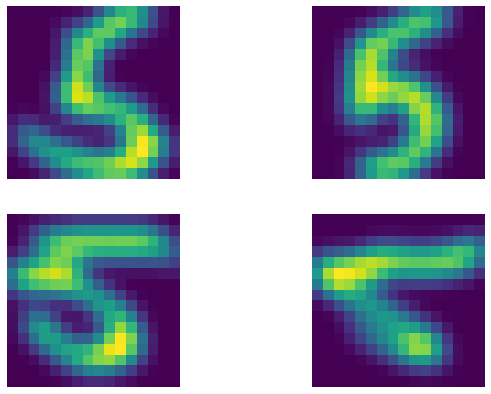

In [13]:
misclassified = []
for i in (not_sames(y_hat,y_test,n_test)[1]):   
    misclassified.append(Image.fromarray(np.uint8(x_test[i]).reshape(16,16)))
fig = plt.figure(figsize=(10, 7))

for i in range(0,len(misclassified)):
    fig.add_subplot(isqrt(len(misclassified)), isqrt(len(misclassified)), i+1)
    plt.imshow(misclassified[i])
    plt.axis('off')

In [147]:
def nn_k(x_train,x_test,y_train,y_test,k):
    heap = []
    heapify(heap)
    y_hat = []

    for t in x_test:
        for i in range(k):
            y_hat_k = []
            for i in range(k):
                heappush(heap, [(-1 * cityblock(t, x_train[i])),y_train[i]])

            for c in range(k,n_train):
                if ( -1 * cityblock(t, x_train[c]) > heap[0][0]):
                    heappop(heap)
                    heappush(heap,[-1 * cityblock(t,  x_train[c]),y_train[c]])
    #         print(heap)
    #         to_be_voted = heappop(heap)[0:3][1]
    #         print(to_be_voted)
            to_be_voted = []
            for j in range (k):
                to_be_voted.append(heappop(heap)[1])
    #         print(to_be_voted)

            if sum(to_be_voted) >= 0:
                y_hat_k.append((1))
            else:
                y_hat_k.append((-1))
        y_hat.append(y_hat_k)
    y_hat = np.array(y_hat).reshape(n_test)
    print(f"Accuracy for k = {k} : {1-(not_sames(y_hat,y_test,n_test)[0]/n_test)}!")
    print(f"Error Rate for k = {k} : {not_sames(y_hat,y_test,n_test)[0]/n_test}!")





In [150]:
for k in k_list:
     nn_k(x_train,x_test,y_train,y_test,k)

Accuracy for k = 3 : 0.9!
Error Rate for k = 3 : 0.1!
Accuracy for k = 5 : 0.825!
Error Rate for k = 5 : 0.175!
Accuracy for k = 7 : 0.85!
Error Rate for k = 7 : 0.15!
Accuracy for k = 9 : 0.85!
Error Rate for k = 9 : 0.15!
Accuracy for k = 11 : 0.85!
Error Rate for k = 11 : 0.15!
Accuracy for k = 13 : 0.825!
Error Rate for k = 13 : 0.175!
Accuracy for k = 1 : 0.9!
Error Rate for k = 1 : 0.1!
